In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Now include your code for data processing, model training, etc.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

#First 5 rows of the data

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# General Information of The Datasets

In [4]:

print("------Train Data Information------")
train_df.info()

print("\n------Test Data Information------")
train_df.info()


------Train Data Information------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

------Test Data Information------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---------

Statistical Information

In [5]:
print("------Train Data Statistical Information------")
train_df.describe()

------Train Data Statistical Information------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("\n------Test Data Statistical Information------")
train_df.describe()


------Test Data Statistical Information------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning and Examining Missing Data

## Missing Values 

Counts of missing values 

In [7]:
print("------Train Data Missing Values------")
print(train_df.isnull().sum())
print("\n------Test Data Missing Values------")
print(test_df.isnull().sum())

------Train Data Missing Values------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

------Test Data Missing Values------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Missing Values as Percentages

In [8]:
missing_data_train = train_df.isnull().sum() / len(train_df) * 100
missing_data_test = test_df.isnull().sum() / len(test_df) * 100

print("------Train Data Missing Values Percentage------")
print(missing_data_train[missing_data_train > 0])

print("\n------Test Data Missing Values Percentage------")
print(missing_data_test[missing_data_test > 0])

------Train Data Missing Values Percentage------
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

------Test Data Missing Values Percentage------
Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64


### Missing Values Visualization

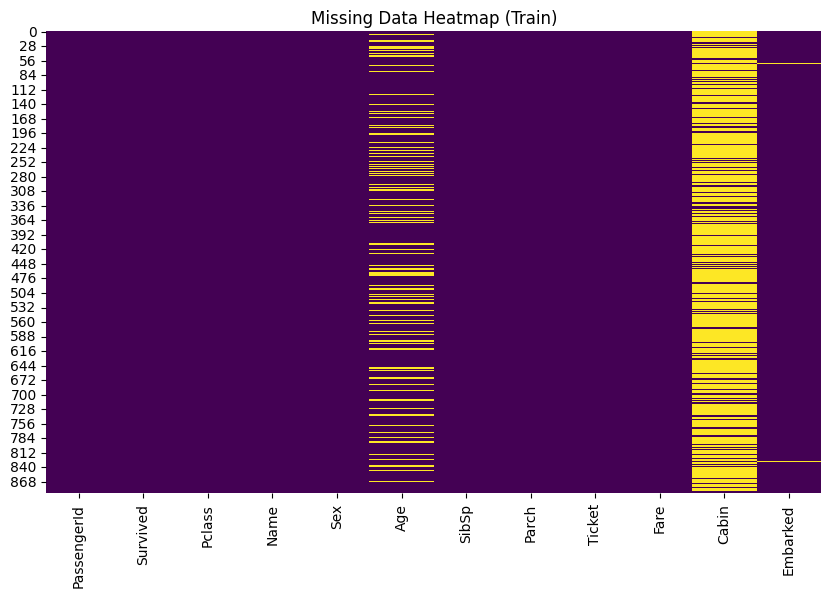

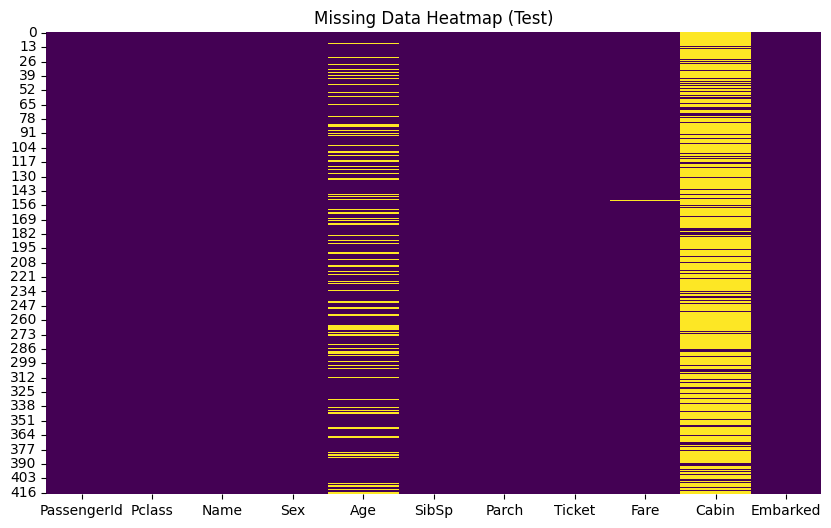

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap (Train)')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap (Test)')
plt.show()

# Data Manipulation and Feature Engineering

 Filling the missing values in the Embarked' column with the most common value

In [10]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

Filling the missing values in the 'Age' column with the average age

In [11]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

Drop this column because the 'cabin' column contains too much missing data

In [12]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

Filling the missing value in the 'Mouse' column with median

In [13]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Data Visualization

Distribution of values in the Survived column for train data

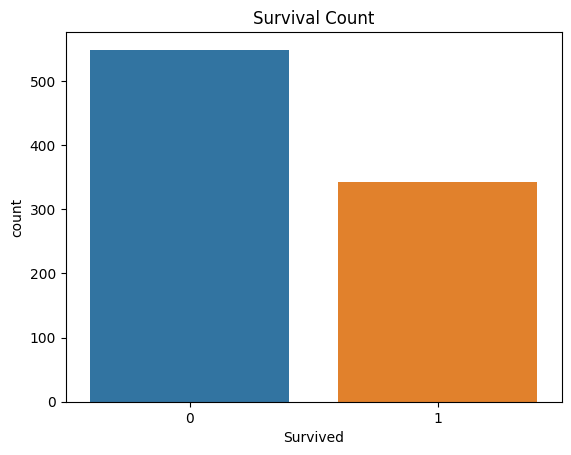

In [14]:
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()

Survival rate by gender

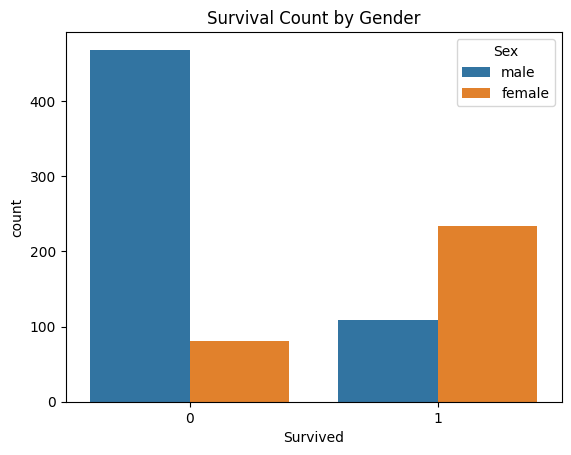

In [15]:
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

Survival rate by age

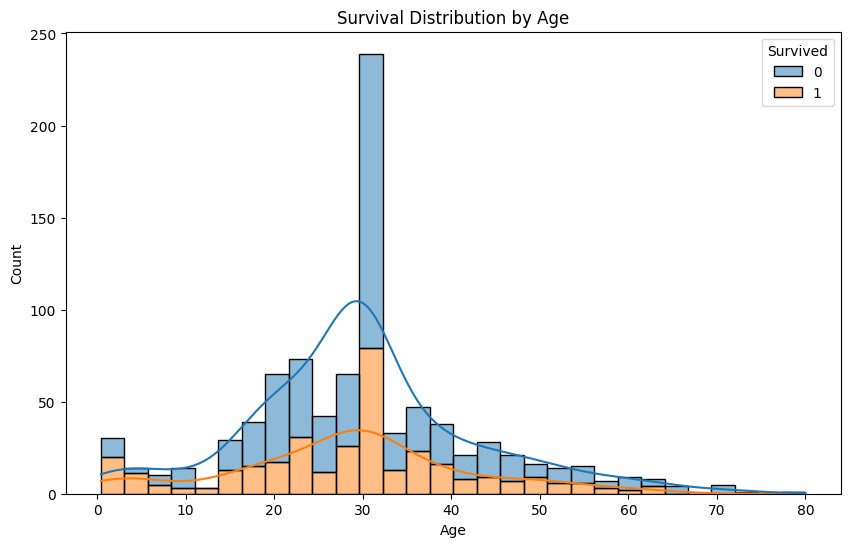

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Distribution by Age')
plt.show()


Survival rate according to Pclass

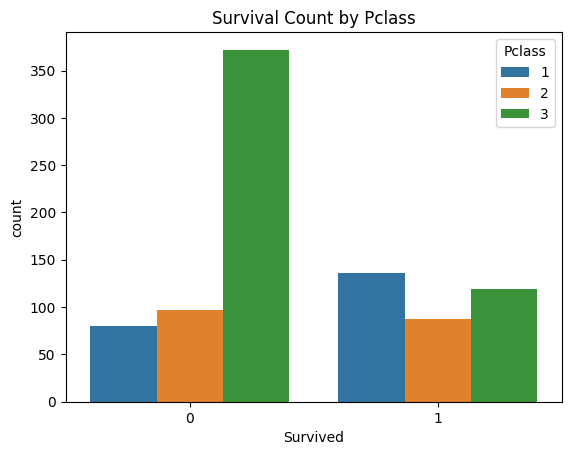

In [17]:
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.title('Survival Count by Pclass')
plt.show()

# Correlation Analysis

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Convert categorical columns with One-Hot Encoding

In [20]:

train_df_encoded = pd.get_dummies(train_df.drop(["Name", "Ticket"],axis=1), columns=['Sex', 'Embarked'])
test_df_encoded = pd.get_dummies(test_df.drop(["Name", "Ticket"] , axis=1), columns=['Sex', 'Embarked'])


In [21]:
train_df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


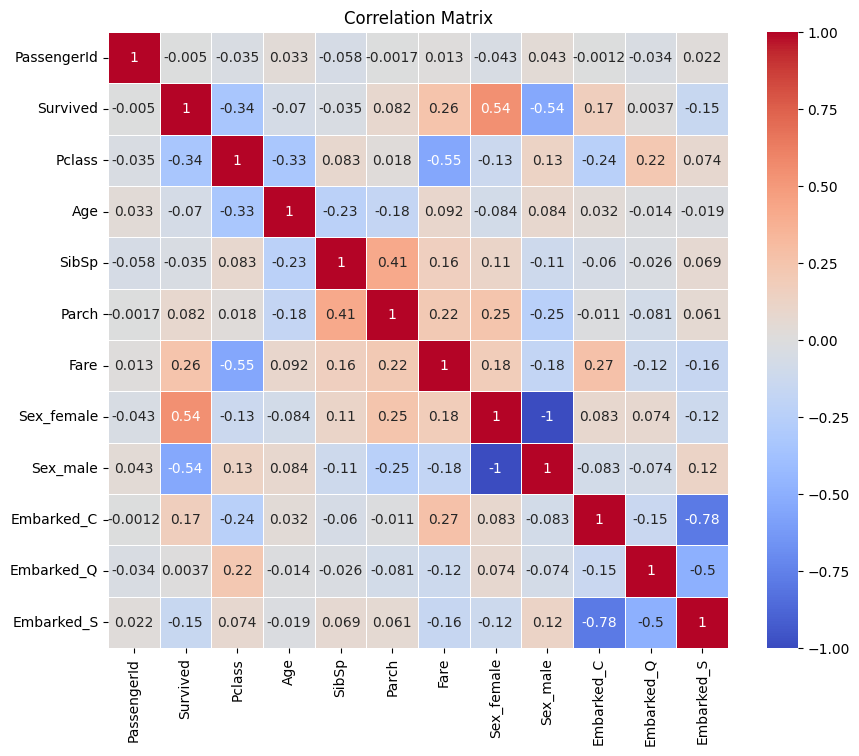

In [22]:
corr_matrix = train_df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We applied all the transformations we made in the train dataset to the test dataset

In [23]:
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Model Training and Evaluation

## Preparation of Data Sets

In [24]:
from sklearn.model_selection import train_test_split

# Separation of features and target variables
X_train = train_df_encoded.drop(columns=['PassengerId','Survived'])
y_train = train_df_encoded['Survived']
X_test = test_df_encoded.drop(columns=['PassengerId'])  

# Separation into training and validation sets
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=61)

## Training of the Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creating a model
model = RandomForestClassifier(n_estimators=100, random_state=61)

# train the model
model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=61)

## Evaluation of the Model

In [26]:
# Make predictions on the validation set
y_valid_pred = model.predict(X_valid_split)

# Calculating the model's accuracy
accuracy = accuracy_score(y_valid_split, y_valid_pred)
print(f'Model Doğruluğu: {accuracy:.2f}')

Model Doğruluğu: 0.76


## Predicting and Preparing Results on a Test Set

In [27]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

#Prepare results as DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df_encoded['PassengerId'],
    'Survived': y_test_pred
})

# Saving results to CSV file
submission.to_csv('submission.csv', index=False)
print('Results saved as "submission.csv" file. ')

Results saved as "submission.csv" file. 
